In [1]:
# Importing libraries
using Plots

In [2]:
# To calculate the Entropy
function calculateEntropy(data)
    if length(data)==0 # edge case
        return 0
    end
    nP = 0
    nQ = 0
    for each in data
        if each[2]=='P'
            nP += 1 
        else
            nQ += 1
        end
    end
    p = nP/length(data)
    q = nQ/length(data)
    p = p!=0 ? (-p * log2(p)) : 0
    q = q!=0 ? (q * log2(q)) : 0
    H = p - q
    return H # returning Entropy
end;

In [3]:
# To calculate the information gains and find optimum threshold
function calculateInfoGain(data)
    values = [each[1] for each in data] # getting attribute values
    values = Set(values)
    values = sort([each for each in values]) # sorting the values
    # generating all possible thresholds 
    thresholds = [(values[i]+values[i+1])/2 for i in 1:length(values)-1]
    info_gains = Dict()
    info_gains_values = []
    # calculating info. gain for all the possible thresholds
    for i in thresholds
        S1 = []
        S2 = []
        for each in data
            if each[1]<i
                append!(S1, [each])
            else
                append!(S2, [each])
            end
        end
        H_S1_S2 = (length(S1)*calculateEntropy(S1) + length(S2)*calculateEntropy(S2))/length(data)
        info_gain = calculateEntropy(data) - H_S1_S2
        info_gains[i] = info_gain
        append!(info_gains_values, [info_gain])
    end
    # optimum threshold having maximum info. gain
    max_info_gain, opt_threshold = findmax(info_gains)
    println("Optimum Threshold: ", opt_threshold)
    println("Maximum Information Gain: $max_info_gain bits")
    # plotting threshold vs info. gain plot
    plot(thresholds, info_gains_values, lw =2, label="", show = true)
    xlabel!("Threshold \u03C4")
    ylabel!("Info. Gain G(\u03C4), bits")
end;

In [4]:
# Given data
S = [
     [0, 'P'],
     [4, 'P'],
     [12, 'P'],
     [16, 'Q'],
     [16, 'Q'],
     [18, 'P'],
     [24, 'Q'],
     [26, 'Q'],
     [28, 'Q'],
     ];

Given S=
Vector{Any}[[0, 'P'], [4, 'P'], [12, 'P'], [16, 'Q'], [16, 'Q'], [18, 'P'], [24, 'Q'], [26, 'Q'], [28, 'Q']]
Optimum Threshold: 14.0
Maximum Information Gain: 0.5577277787393196 bits


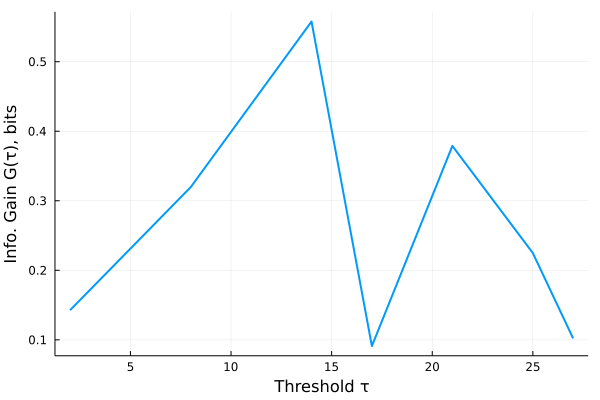

In [5]:
println("Given S=")
println(S)
# Calling the main method to find out opt threshold
calculateInfoGain(S)

In [6]:
# Generating random dataset
choices = "PQ"
S = [[rand(1:100), choices[rand(1:2)]] for i in 1:rand(1:100)]
# Testing with random dataset
# Or uncomment next line and give your own dataset S...
# S = 
println("Now testng with another dataset S=")
println(S)

Now testng with another dataset S=
Vector{Any}[[89, 'Q'], [49, 'Q'], [11, 'P'], [2, 'Q'], [25, 'Q'], [79, 'P'], [84, 'P'], [86, 'Q'], [91, 'Q'], [95, 'P'], [46, 'P'], [83, 'P'], [5, 'Q'], [26, 'Q'], [38, 'P'], [75, 'P'], [25, 'P'], [80, 'P']]


Optimum Threshold: 8.0
Maximum Information Gain: 0.14269027946047552 bits


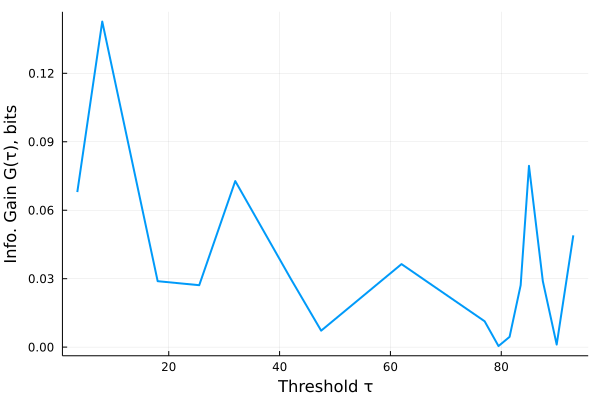

In [7]:
calculateInfoGain(S)